In [89]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# api = requests.get('https://api.data.gov/ed/collegescorecard/v1/schools?fields=school.name,id,2013.aid.median_debt.completers.overall,2013.repayment.1_yr_repayment.completers,2013.earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings&per_page=100&api_key=GKtiUO1wWhMNii4ZH4C0tfeZbGmmfscKhv2amMvs')
# this is my api key

In [2]:
%ls

Project4_api_data-Copy1.ipynb
Project4_api_data.ipynb
Project_4_11.24.17.ipynb
Project_4_11.25.17-Continue.ipynb
Project_4_11.25.17.ipynb
Project_4_11.26.17-Continue.ipynb
Project_4_11.27.17-Continue-Copy1.ipynb
Project_4_11.27.17-Redo-try more features.ipynb
Project_4_11.27.17-Redo.ipynb
Project_4_11.28.17.ipynb
Project_4_11.29.17.ipynb
Project_4_keerthy-Copy1.ipynb
Project_4_keerthy.ipynb
df.csv
new_file


In [3]:
left_half = 'https://api.data.gov/ed/collegescorecard/v1/schools?school.degrees_awarded.predominant=3&fields=school.name,id,2015.student.enrollment.all,2015.repayment.3_yr_default_rate,2015.student.share_dependent_middleincome.300001_48000,2015.student.demographics.median_family_income,2015.cost.attendance.academic_year,2015.student.share_dependent_middleincome.48001_75000,2015.student.share_dependent_highincome.75001_110000,2015.student.share_dependent_highincome.110001plus,2015.admissions.sat_scores.average.overall,2015.cost.avg_net_price.public,2015.cost.avg_net_price.private,2015.admissions.admission_rate.by_ope_id,2015.admissions.admission_rate.overall,2015.completion.completion_rate_4yr_100nt,2015.aid.median_debt.completers.overall,2015.student.demographics.median_family_income,2015.aid.median_debt.number.completers,2015.aid.median_debt.number.noncompleters,2015.aid.median_debt.number.pell_grant,2015.aid.median_debt.number.no_pell_grant,2015.repayment.3_yr_repayment.female_students,2015.repayment.3_yr_repayment.male_students&page='
# left_half = 'https://api.data.gov/ed/collegescorecard/v1/schools?fields=2015.aid.median_debt.completers.overall,2015.repayment.3_yr_repayment.completers,2015.repayment.5_yr_repayment.completers,2015.student.demographics.median_family_income,2015.repayment.3_yr_default_rate_denom,2015.aid.median_debt.number.completers,2015.aid.median_debt.number.noncompleters,2015.aid.median_debt.number.pell_grant,2015.aid.median_debt.number.no_pell_grant,2015.repayment.3_yr_repayment.female_students,2015.repayment.3_yr_repayment.male_students&page='
right_half = '&per_page=100&api_key=iWpmbz9Bzlap6R3TCn5prVHlLXnIgeQC7xArrHQu'
#right_half = '&per_page=100&api_key=azpzcNd2tDpvmj1ulrXQ7OtNr2aO9WS20qzUBAt2'

In [4]:
# Pull down the data from the API with the above for loop. Going forward, use the csv file saved below.

lst = []

for i in range(76):
    url = left_half + str(i) + right_half
#     print(url)
    rs = requests.get(url)
    rsj = rs.json()
    lst.append(rsj)

In [5]:
# Convert to Dataframe

df = pd.DataFrame()

for a in range(0,len(lst)):
    df2 = pd.DataFrame(lst[a]['results'])
    df = df.append(df2)
df.shape

(2109, 23)

In [8]:
# df.to_csv('df.csv', index=False)

In [9]:
 df = pd.read_csv('df.csv')#.drop('Unnamed: 0', axis=1)

In [10]:
df.head()

,2015.admissions.admission_rate.by_ope_id,2015.admissions.admission_rate.overall,2015.admissions.sat_scores.average.overall,2015.aid.median_debt.completers.overall,2015.aid.median_debt.number.completers,2015.aid.median_debt.number.no_pell_grant,2015.aid.median_debt.number.noncompleters,2015.aid.median_debt.number.pell_grant,2015.completion.completion_rate_4yr_100nt,2015.cost.attendance.academic_year,...,2015.repayment.3_yr_repayment.female_students,2015.repayment.3_yr_repayment.male_students,2015.student.demographics.median_family_income,2015.student.enrollment.all,2015.student.share_dependent_highincome.110001plus,2015.student.share_dependent_highincome.75001_110000,2015.student.share_dependent_middleincome.300001_48000,2015.student.share_dependent_middleincome.48001_75000,id,school.name
0,0.583180,0.5832,1226.0,24000.0,4349.0,5557.0,5635.0,4386.0,0.6583,26726.0,...,4445.0,4390.0,74146.0,NaN,0.390147,0.171849,0.116059,0.151631,166629,University of Massachusetts-Amherst
1,0.747752,0.7478,1029.0,25500.0,4227.0,3151.0,6205.0,7204.0,0.1311,19570.0,...,5685.0,4073.0,36618.0,NaN,0.169433,0.173944,0.157524,0.177914,169798,Eastern Michigan University
2,0.567874,0.5679,1197.0,25000.0,3314.0,3222.0,3695.0,3740.0,0.3102,24804.0,...,2076.0,2769.0,53644.0,NaN,0.336439,0.174841,0.129966,0.145905,166513,University of Massachusetts-Lowell
3,0.762614,0.7626,1025.0,25760.0,1934.0,1778.0,2266.0,2405.0,0.2775,24539.0,...,1896.0,2056.0,48473.0,NaN,0.231663,0.167275,0.152340,0.176900,167987,University of Massachusetts-Dartmouth
4,0.641537,0.6415,1042.0,24500.0,1533.0,959.0,1168.0,1719.0,0.6263,47322.0,...,1701.0,863.0,42388.0,NaN,0.381801,0.231707,0.104128,0.145403,167899,Springfield College


In [11]:
df.columns

Index(['2015.admissions.admission_rate.by_ope_id',
       '2015.admissions.admission_rate.overall',
       '2015.admissions.sat_scores.average.overall',
       '2015.aid.median_debt.completers.overall',
       '2015.aid.median_debt.number.completers',
       '2015.aid.median_debt.number.no_pell_grant',
       '2015.aid.median_debt.number.noncompleters',
       '2015.aid.median_debt.number.pell_grant',
       '2015.completion.completion_rate_4yr_100nt',
       '2015.cost.attendance.academic_year', '2015.cost.avg_net_price.private',
       '2015.cost.avg_net_price.public', '2015.repayment.3_yr_default_rate',
       '2015.repayment.3_yr_repayment.female_students',
       '2015.repayment.3_yr_repayment.male_students',
       '2015.student.demographics.median_family_income',
       '2015.student.enrollment.all',
       '2015.student.share_dependent_highincome.110001plus',
       '2015.student.share_dependent_highincome.75001_110000',
       '2015.student.share_dependent_middleincome.300001_

In [12]:
# Create list of column names to rename
renameLst = ['admissions.admission_rate.by_ope_id',
       'admissions.admission_rate.overall',
       'admissions.sat_scores.average.overall',
       'aid.median_debt.completers.overall',
       'aid.median_debt.number.completers',
       'aid.median_debt.number.no_pell_grant',
       'aid.median_debt.number.noncompleters',
       'aid.median_debt.number.pell_grant',
       'completion.completion_rate_4yr_100nt',
       'cost.attendance.academic_year', 
       'cost.avg_net_price.private',
       'cost.avg_net_price.public', 
       'repayment.3_yr_default_rate',
       'repayment.3_yr_repayment.female_students',
       'repayment.3_yr_repayment.male_students',
       'student.demographics.median_family_income',
       'student.enrollment.all',
       'student.share_dependent_highincome.110001plus',
       'student.share_dependent_highincome.75001_110000',
       'student.share_dependent_middleincome.300001_48000',
       'student.share_dependent_middleincome.48001_75000', 
       'id',
       'school.name']

In [13]:
 for i, val in enumerate(renameLst):
        renameLst[i] = val.replace('.',' ')
print(renameLst)

['admissions admission_rate by_ope_id', 'admissions admission_rate overall', 'admissions sat_scores average overall', 'aid median_debt completers overall', 'aid median_debt number completers', 'aid median_debt number no_pell_grant', 'aid median_debt number noncompleters', 'aid median_debt number pell_grant', 'completion completion_rate_4yr_100nt', 'cost attendance academic_year', 'cost avg_net_price private', 'cost avg_net_price public', 'repayment 3_yr_default_rate', 'repayment 3_yr_repayment female_students', 'repayment 3_yr_repayment male_students', 'student demographics median_family_income', 'student enrollment all', 'student share_dependent_highincome 110001plus', 'student share_dependent_highincome 75001_110000', 'student share_dependent_middleincome 300001_48000', 'student share_dependent_middleincome 48001_75000', 'id', 'school name']


In [14]:
df.columns = renameLst

In [15]:
df.head()

,admissions admission_rate by_ope_id,admissions admission_rate overall,admissions sat_scores average overall,aid median_debt completers overall,aid median_debt number completers,aid median_debt number no_pell_grant,aid median_debt number noncompleters,aid median_debt number pell_grant,completion completion_rate_4yr_100nt,cost attendance academic_year,...,repayment 3_yr_repayment female_students,repayment 3_yr_repayment male_students,student demographics median_family_income,student enrollment all,student share_dependent_highincome 110001plus,student share_dependent_highincome 75001_110000,student share_dependent_middleincome 300001_48000,student share_dependent_middleincome 48001_75000,id,school name
0,0.583180,0.5832,1226.0,24000.0,4349.0,5557.0,5635.0,4386.0,0.6583,26726.0,...,4445.0,4390.0,74146.0,NaN,0.390147,0.171849,0.116059,0.151631,166629,University of Massachusetts-Amherst
1,0.747752,0.7478,1029.0,25500.0,4227.0,3151.0,6205.0,7204.0,0.1311,19570.0,...,5685.0,4073.0,36618.0,NaN,0.169433,0.173944,0.157524,0.177914,169798,Eastern Michigan University
2,0.567874,0.5679,1197.0,25000.0,3314.0,3222.0,3695.0,3740.0,0.3102,24804.0,...,2076.0,2769.0,53644.0,NaN,0.336439,0.174841,0.129966,0.145905,166513,University of Massachusetts-Lowell
3,0.762614,0.7626,1025.0,25760.0,1934.0,1778.0,2266.0,2405.0,0.2775,24539.0,...,1896.0,2056.0,48473.0,NaN,0.231663,0.167275,0.152340,0.176900,167987,University of Massachusetts-Dartmouth
4,0.641537,0.6415,1042.0,24500.0,1533.0,959.0,1168.0,1719.0,0.6263,47322.0,...,1701.0,863.0,42388.0,NaN,0.381801,0.231707,0.104128,0.145403,167899,Springfield College


# Data Cleaning

In [16]:
df.dtypes

admissions admission_rate by_ope_id                  float64
admissions admission_rate overall                    float64
admissions sat_scores average overall                float64
aid median_debt completers overall                   float64
aid median_debt number completers                    float64
aid median_debt number no_pell_grant                 float64
aid median_debt number noncompleters                 float64
aid median_debt number pell_grant                    float64
completion completion_rate_4yr_100nt                 float64
cost attendance academic_year                        float64
cost avg_net_price private                           float64
cost avg_net_price public                            float64
repayment 3_yr_default_rate                          float64
repayment 3_yr_repayment female_students             float64
repayment 3_yr_repayment male_students               float64
student demographics median_family_income            float64
student enrollment all  

In [17]:
#df.dropna(axis=0).shape # Use drop na and see what the shape is as a result.

In [18]:
df.shape

(2109, 23)

In [19]:
df.describe()

,admissions admission_rate by_ope_id,admissions admission_rate overall,admissions sat_scores average overall,aid median_debt completers overall,aid median_debt number completers,aid median_debt number no_pell_grant,aid median_debt number noncompleters,aid median_debt number pell_grant,completion completion_rate_4yr_100nt,cost attendance academic_year,...,repayment 3_yr_default_rate,repayment 3_yr_repayment female_students,repayment 3_yr_repayment male_students,student demographics median_family_income,student enrollment all,student share_dependent_highincome 110001plus,student share_dependent_highincome 75001_110000,student share_dependent_middleincome 300001_48000,student share_dependent_middleincome 48001_75000,id
count,1694.000000,1663.000000,1230.000000,1945.000000,1965.000000,1959.000000,1965.000000,1959.000000,1929.000000,1930.000000,...,1990.000000,1930.000000,1930.000000,2084.000000,0.0,756.000000,777.000000,1333.000000,1170.000000,2109.000000
mean,0.661394,0.664378,1061.692683,24104.188689,2896.670229,1941.089842,5452.566412,6349.047473,0.342672,32494.789637,...,0.072763,7093.811917,3559.215026,43974.191939,NaN,0.177245,0.148932,0.158840,0.164808,224535.386913
std,0.197983,0.201778,135.371537,6052.420066,8256.402136,4241.192647,19759.871076,23555.852066,0.234754,13895.541755,...,0.051361,30878.907512,12687.384795,22594.816843,NaN,0.099985,0.053513,0.032102,0.034902,106003.859029
min,0.000000,0.000000,708.000000,1700.000000,10.000000,11.000000,10.000000,13.000000,0.000000,6748.000000,...,0.000000,10.000000,10.000000,0.000000,NaN,0.003576,0.015376,0.060201,0.034530,100654.000000
25%,0.540746,0.540550,976.000000,21148.000000,307.000000,245.000000,279.000000,343.500000,0.159100,21111.750000,...,0.035000,337.750000,239.000000,26423.750000,NaN,0.095343,0.105951,0.138114,0.146050,156541.000000
50%,0.678314,0.683400,1043.000000,25000.000000,688.000000,561.000000,699.000000,789.000000,0.310500,29669.000000,...,0.059000,806.500000,525.500000,40104.500000,NaN,0.164273,0.155633,0.159272,0.165242,196246.000000
75%,0.800000,0.805450,1122.000000,27000.000000,2109.000000,1653.000000,2354.000000,3020.000000,0.503800,42090.750000,...,0.105000,2427.000000,1678.250000,58327.750000,NaN,0.237768,0.186919,0.178105,0.185595,230995.000000
max,1.000000,1.000000,1544.000000,50750.000000,57969.000000,26641.000000,138931.000000,167541.000000,1.000000,67572.000000,...,0.295000,220697.000000,86430.000000,121793.000000,NaN,0.562500,0.326797,0.309091,0.340000,487603.000000


In [20]:
df.isnull().sum()

admissions admission_rate by_ope_id                   415
admissions admission_rate overall                     446
admissions sat_scores average overall                 879
aid median_debt completers overall                    164
aid median_debt number completers                     144
aid median_debt number no_pell_grant                  150
aid median_debt number noncompleters                  144
aid median_debt number pell_grant                     150
completion completion_rate_4yr_100nt                  180
cost attendance academic_year                         179
cost avg_net_price private                            744
cost avg_net_price public                            1543
repayment 3_yr_default_rate                           119
repayment 3_yr_repayment female_students              179
repayment 3_yr_repayment male_students                179
student demographics median_family_income              25
student enrollment all                               2109
student share_

In [21]:
df.drop(labels=['cost avg_net_price private','cost avg_net_price public','student enrollment all','student share_dependent_highincome 110001plus','student share_dependent_middleincome 300001_48000','student share_dependent_middleincome 48001_75000','student share_dependent_highincome 75001_110000','id'], axis=1, inplace=True)

In [22]:
df = df.dropna(axis=0)

In [23]:
df.shape

(1184, 15)

# EDA

In [24]:
corrmat = df.corr()

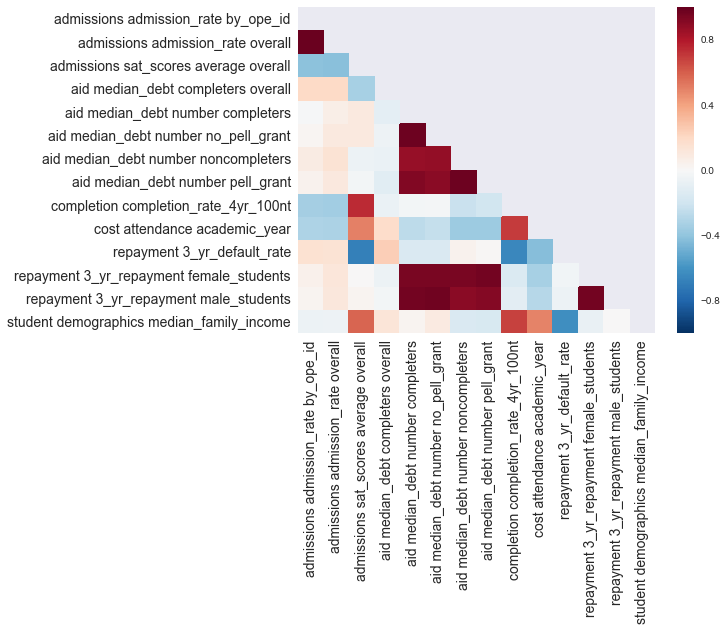

In [25]:
fig, ax = plt.subplots(figsize = (8, 6))
                       
# Generate a mask for the upper triangle (taken from seaborn example gallery)                       
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrmat, mask=mask, ax=ax)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

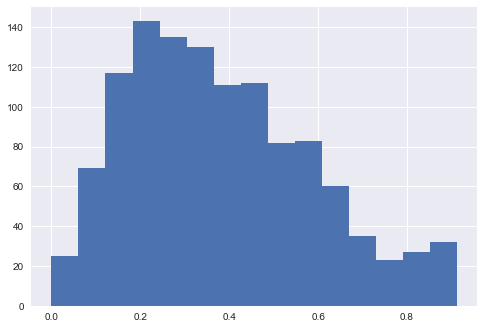

In [26]:
df['completion completion_rate_4yr_100nt'].hist(bins=15)

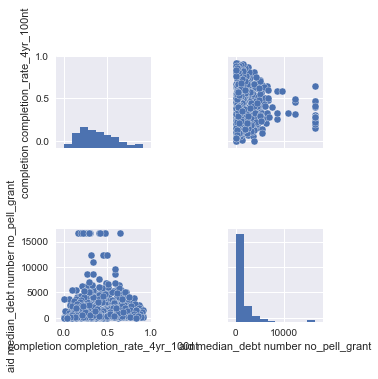

In [27]:
sns.pairplot(df[['completion completion_rate_4yr_100nt','aid median_debt number no_pell_grant']])

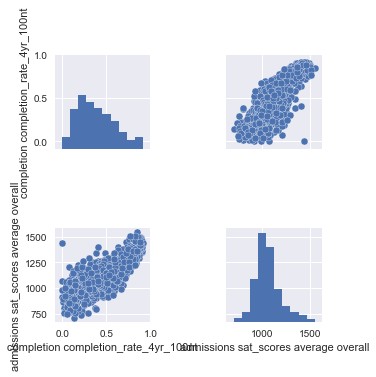

In [28]:
sns.pairplot(df[['completion completion_rate_4yr_100nt','admissions sat_scores average overall']], fig.set_size_inches(20,20))

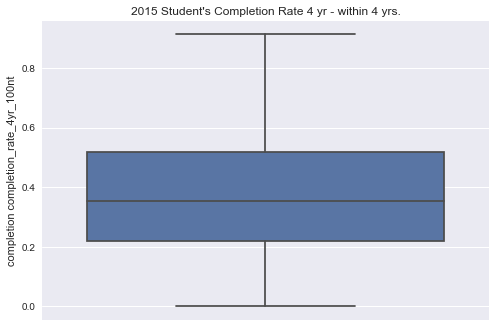

In [29]:
sns.boxplot(y=df['completion completion_rate_4yr_100nt']).set_title('2015 Student\'s Completion Rate 4 yr - within 4 yrs.')


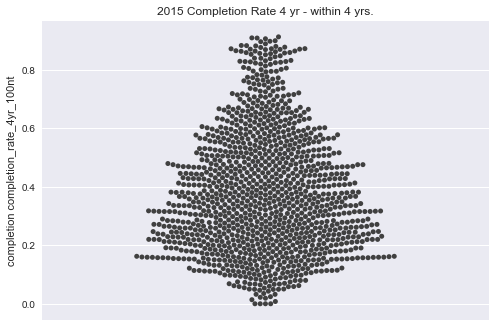

In [30]:
sns.swarmplot(y=df['completion completion_rate_4yr_100nt'], color=".25").set_title('2015 Completion Rate 4 yr - within 4 yrs.')

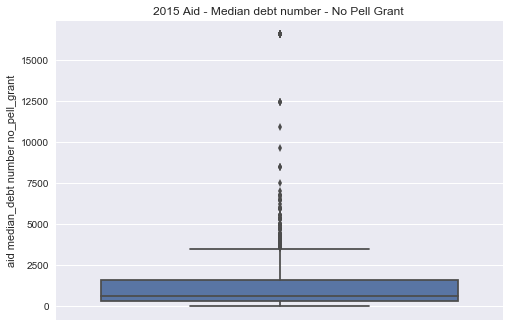

In [31]:
sns.boxplot(y=df['aid median_debt number no_pell_grant']).set_title('2015 Aid - Median debt number - No Pell Grant ')


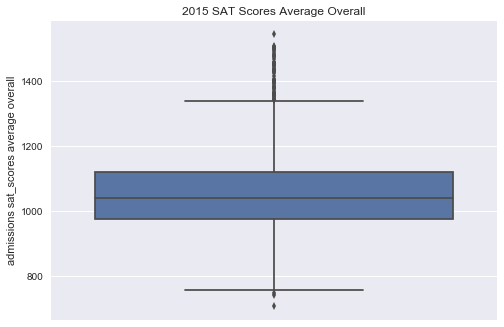

In [32]:
sns.boxplot(y=df['admissions sat_scores average overall']).set_title('2015 SAT Scores Average Overall')

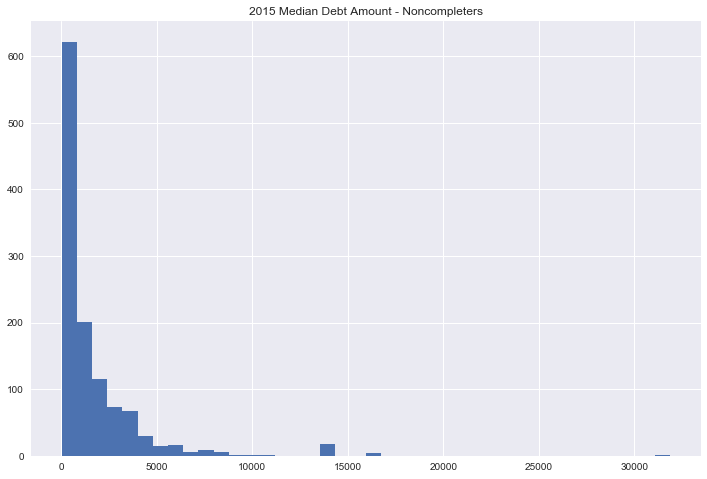

In [33]:
df['aid median_debt number noncompleters'].hist(bins=40, figsize=(12,8)).set_title('2015 Median Debt Amount - Noncompleters')

In [34]:
df['aid median_debt number noncompleters'].value_counts().sort_values(ascending=False)

14047.0    17
379.0       5
335.0       5
546.0       4
358.0       4
369.0       4
223.0       4
16479.0     4
18.0        4
491.0       4
3875.0      4
572.0       4
2688.0      4
331.0       4
315.0       3
1001.0      3
119.0       3
438.0       3
232.0       3
544.0       3
759.0       3
473.0       3
3630.0      3
515.0       3
461.0       3
493.0       3
450.0       3
195.0       3
500.0       3
384.0       3
           ..
703.0       1
215.0       1
875.0       1
1512.0      1
673.0       1
3195.0      1
2342.0      1
2522.0      1
1359.0      1
1161.0      1
5965.0      1
3683.0      1
2215.0      1
4255.0      1
1422.0      1
2693.0      1
1015.0      1
487.0       1
1159.0      1
4121.0      1
5502.0      1
2622.0      1
374.0       1
1516.0      1
961.0       1
3760.0      1
181.0       1
5454.0      1
1464.0      1
5635.0      1
Name: aid median_debt number noncompleters, Length: 915, dtype: int64

In [35]:
df.loc[df['aid median_debt number noncompleters'] == 14047.0,'school name']

341     Pennsylvania State University-Penn State Abington
342        Pennsylvania State University-Penn State Berks
343       Pennsylvania State University-Penn State Beaver
344     Pennsylvania State University-Penn State Fayet...
417            Pennsylvania State University-World Campus
1215        Pennsylvania State University-Penn State York
1216    Pennsylvania State University-Penn State Brand...
1217    Pennsylvania State University-Penn State Schuy...
1218    Pennsylvania State University-Penn State Great...
1341    Pennsylvania State University-Penn State Erie-...
1342     Pennsylvania State University-Penn State Altoona
1343    Pennsylvania State University-Penn State Lehig...
1344    Pennsylvania State University-Penn State Harri...
1488            Pennsylvania State University-Main Campus
1489    Pennsylvania State University-Penn State Worth...
1490    Pennsylvania State University-Penn State Wilke...
1491    Pennsylvania State University-Penn State New K...
Name: school n

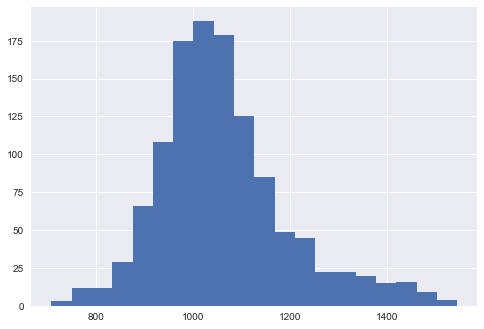

In [36]:
df['admissions sat_scores average overall'].hist(bins=20)

# Assign X and y variables:

In [37]:
X = df[[c for c in df.columns if not 'school name' in c and not 'completion completion_rate_4yr_100nt' in c]]

In [38]:
df.columns

Index(['admissions admission_rate by_ope_id',
       'admissions admission_rate overall',
       'admissions sat_scores average overall',
       'aid median_debt completers overall',
       'aid median_debt number completers',
       'aid median_debt number no_pell_grant',
       'aid median_debt number noncompleters',
       'aid median_debt number pell_grant',
       'completion completion_rate_4yr_100nt', 'cost attendance academic_year',
       'repayment 3_yr_default_rate',
       'repayment 3_yr_repayment female_students',
       'repayment 3_yr_repayment male_students',
       'student demographics median_family_income', 'school name'],
      dtype='object')

In [39]:
X.dtypes

admissions admission_rate by_ope_id          float64
admissions admission_rate overall            float64
admissions sat_scores average overall        float64
aid median_debt completers overall           float64
aid median_debt number completers            float64
aid median_debt number no_pell_grant         float64
aid median_debt number noncompleters         float64
aid median_debt number pell_grant            float64
cost attendance academic_year                float64
repayment 3_yr_default_rate                  float64
repayment 3_yr_repayment female_students     float64
repayment 3_yr_repayment male_students       float64
student demographics median_family_income    float64
dtype: object

In [40]:
X

,admissions admission_rate by_ope_id,admissions admission_rate overall,admissions sat_scores average overall,aid median_debt completers overall,aid median_debt number completers,aid median_debt number no_pell_grant,aid median_debt number noncompleters,aid median_debt number pell_grant,cost attendance academic_year,repayment 3_yr_default_rate,repayment 3_yr_repayment female_students,repayment 3_yr_repayment male_students,student demographics median_family_income
0,0.583180,0.5832,1226.0,24000.0,4349.0,5557.0,5635.0,4386.0,26726.0,0.030,4445.0,4390.0,74146.0
1,0.747752,0.7478,1029.0,25500.0,4227.0,3151.0,6205.0,7204.0,19570.0,0.086,5685.0,4073.0,36618.0
2,0.567874,0.5679,1197.0,25000.0,3314.0,3222.0,3695.0,3740.0,24804.0,0.053,2076.0,2769.0,53644.0
3,0.762614,0.7626,1025.0,25760.0,1934.0,1778.0,2266.0,2405.0,24539.0,0.054,1896.0,2056.0,48473.0
4,0.641537,0.6415,1042.0,24500.0,1533.0,959.0,1168.0,1719.0,47322.0,0.070,1701.0,863.0,42388.0
5,0.706314,0.7063,1028.0,23695.0,3510.0,2526.0,4743.0,5682.0,19076.0,0.106,4166.0,2923.0,37152.0
6,0.891055,0.8911,1143.0,22750.0,4329.0,3963.0,3840.0,4170.0,24738.0,0.044,3244.0,3083.0,61106.0
7,0.716882,0.7169,1159.0,19656.5,3218.0,2856.0,3544.0,3881.0,23873.0,0.072,3314.0,2757.0,46439.0
8,0.934675,0.9347,1145.0,20500.0,4407.0,3926.0,3544.0,4001.0,23733.0,0.042,3679.0,3551.0,59818.0
9,0.853928,0.8539,1047.0,25000.0,1743.0,1200.0,2794.0,3312.0,18898.0,0.080,2244.0,1448.0,34684.0


In [41]:
X.columns

Index(['admissions admission_rate by_ope_id',
       'admissions admission_rate overall',
       'admissions sat_scores average overall',
       'aid median_debt completers overall',
       'aid median_debt number completers',
       'aid median_debt number no_pell_grant',
       'aid median_debt number noncompleters',
       'aid median_debt number pell_grant', 'cost attendance academic_year',
       'repayment 3_yr_default_rate',
       'repayment 3_yr_repayment female_students',
       'repayment 3_yr_repayment male_students',
       'student demographics median_family_income'],
      dtype='object')

In [42]:
y = df['completion completion_rate_4yr_100nt']

# Train, Test, Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=100)

In [44]:
X_train.shape, y_train.shape

((793, 13), (793,))

In [45]:
 X_test.shape, y_test.shape

((391, 13), (391,))

# Linear Regression Model

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
lr.score(X_train, y_train)

0.75443751288460814

In [49]:
lr.score(X_test, y_test)

0.76776935972535298

In [50]:
lr.coef_

array([ -7.57456217e-02,   7.22214222e-03,   4.98949737e-04,
        -1.55875248e-07,   3.16293074e-04,  -2.87432680e-04,
         2.82394802e-04,  -2.93124846e-04,   4.64626592e-06,
        -3.79893729e-01,   6.30854273e-06,  -3.68442779e-05,
         2.77268454e-06])

In [51]:
scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validated scores =', scores) # check for overfitting using X and y....

Cross-validated scores = [ 0.73238807  0.77735263  0.77728781  0.70303711  0.74411253]


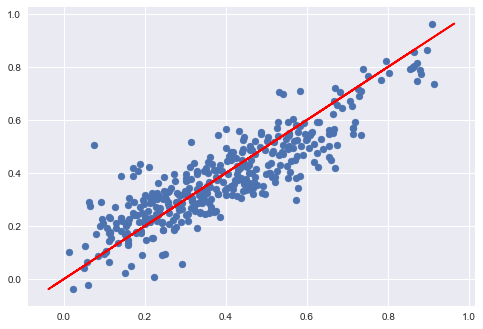

In [52]:
predictions = lr.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(predictions,predictions, color='red')


In [53]:
r2 = r2_score(y_test, predictions)
print('Cross-Predicted R2 =', r2)

Cross-Predicted R2 = 0.767769359725


# Random Forest Model

In [54]:
rf = RandomForestRegressor()

In [55]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [56]:
rf.score(X_train, y_train)

0.95490686483215947

In [57]:
rf.score(X_test, y_test)

0.75995853463300644

In [58]:
scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validated scores =', scores)

Cross-validated scores = [ 0.73238807  0.77735263  0.77728781  0.70303711  0.74411253]


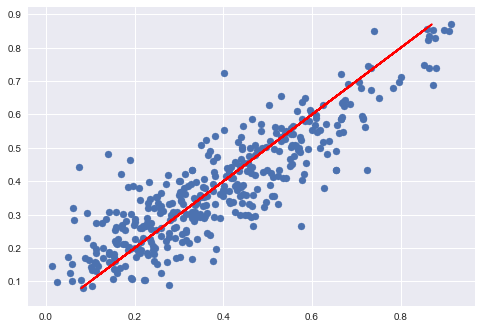

In [59]:
predictions = rf.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(predictions,predictions, color='red')


# GridCV with Lasso Model

In [60]:
ls = Lasso()

In [61]:
params = {'alpha': [.1,100]}

In [62]:
 grid = GridSearchCV(ls,param_grid=params, cv=5, n_jobs=-1)

In [63]:
grid.fit(X_train, y_train)

/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.1, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [64]:
grid.score(X_train, y_train)

0.74899483881571571

In [65]:
grid.score(X_test, y_test)

0.76347802300698164

In [70]:
grid.best_score_

0.74181109851221771

In [66]:
scores = cross_val_score(lr, X, y, cv=5)
print('Cross-validated scores =', scores)

Cross-validated scores = [ 0.73238807  0.77735263  0.77728781  0.70303711  0.74411253]


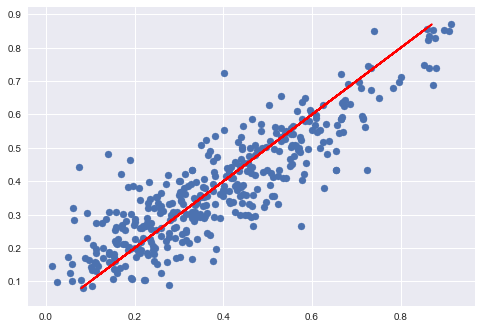

In [67]:
predictions = rf.predict(X_test)
plt.scatter(y_test, predictions)
plt.plot(predictions,predictions, color='red')

# Keras Regression Model

In [103]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X,y) 

In [104]:
ss = StandardScaler()

In [105]:
Xs_train = ss.fit_transform(Xs_train)
Xs_test = ss.transform(Xs_test)

In [106]:
model = Sequential()

In [107]:
Xs_train.shape

(888, 13)

In [118]:
model.add(Dense(13, input_dim=Xs_train.shape[1], activation='relu'))
model.add(Dense(1))

In [119]:
model.compile

<bound method Sequential.compile of <keras.models.Sequential object at 0x12dc19710>>

In [120]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [121]:
model.fit(Xs_train, ys_train, validation_data=(Xs_test, ys_test), epochs=10)

Train on 888 samples, validate on 296 samples
Epoch 1/10
888/888 [==============================] - 1s 599us/step - loss: 0.2078 - acc: 0.0023 - val_loss: 0.1689 - val_acc: 0.0068
Epoch 2/10
888/888 [==============================] - 0s 49us/step - loss: 0.1219 - acc: 0.0023 - val_loss: 0.1113 - val_acc: 0.0068
Epoch 3/10
888/888 [==============================] - 0s 51us/step - loss: 0.0806 - acc: 0.0023 - val_loss: 0.0773 - val_acc: 0.0068
Epoch 4/10
888/888 [==============================] - 0s 52us/step - loss: 0.0561 - acc: 0.0023 - val_loss: 0.0570 - val_acc: 0.0068
Epoch 5/10
888/888 [==============================] - 0s 52us/step - loss: 0.0411 - acc: 0.0023 - val_loss: 0.0430 - val_acc: 0.0068
Epoch 6/10
888/888 [==============================] - 0s 52us/step - loss: 0.0301 - acc: 0.0023 - val_loss: 0.0301 - val_acc: 0.0068
Epoch 7/10
888/888 [==============================] - 0s 51us/step - loss: 0.0207 - acc: 0.0023 - val_loss: 0.0211 - val_acc: 0.0068
Epoch 8/10
888/888 [==